# Tutorial 1 – Simple Classifiers

Nearest Centroid Classifiers:

a) Program an iteratively trained nearest centroid classifier (NCC) that classifies
the digit 0 against all others

b) Train the NCC on 70% of the entire data set

c) In each iteration of the training phase store the prediction accuracy on the remaining 30% of the data (the test data set)

d) The NCC function should return the accuracy on the test data and the weight vector

e) Plot the accuracy as a function of iterations and plot the centroid of the digit 0 as an image


In [8]:
# please fill all missing lines
# you need to start with the function 'digits'
# then continue with ncc_train and then predict_ncc
# if it the code is completed correctly,
# it will print a pdf in the local folder with results
# happy coding..

import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [11]:
fname = "usps.mat"
imgs,labels = load_data(fname)

In [12]:
imgs.shape[1]

2007

In [13]:
def ncc_train(X,Y, Xtest, Ytest):
    # initialize accuracy vector
    acc = sp.zeros(X.shape[-1])
    # unique class labels
    cids = sp.unique(Y)
    # initialize mu, shape should be (256,2) - why? 
    mu = np.zeros((X.shape[0], len(cids)))
    # initialize counter , shape should be (2,) - why?
    Nk = np.zeros(len(cids))

    # loop over all data points in training set
    for n in range(len(Y)):
        # set idx to current class label
        idx = cids==Y[n]
        # update mu
        
        mu[:,idx] = (n/(n+1)*mu[:,idx].T+1/(n+1)*X[:,n]).T
        # update counter
        Nk[idx]+=1
        # predict test labels with current mu
        yhat = predict_ncc(Xtest, mu)
        # calculate current accuracy with test labels
        acc[n] = np.sum(yhat==Ytest)/len(Ytest)
    # return weight vector and error
    return mu, acc

In [14]:
def predict_ncc(X, mu):
    # do nearest-centroid classification
    # initialize distance matrix with zeros and shape (602,2) - why?
    NCdist = np.zeros((X.shape[1], mu.shape[1]))
    # compute euclidean distance to centroids
    # loop over both classes
    for ic in sp.arange(mu.shape[-1]):
        # calculate distances of every point to centroid
        # in one line
        NCdist[:,ic] = np.sqrt(np.sum((X.T-mu[:,ic])**2, axis=1))
    # assign the class label of the nearest (euclidean distance) centroid
    Yclass = NCdist.argmin(axis=1)
    Yclass[Yclass==0]=-1 #for some reason prof did -1 for not 0 (okaaaay...)
    
    return Yclass

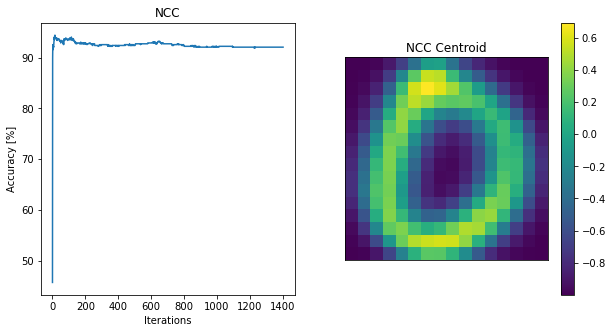

In [15]:
def digits(digit):
    fname = "usps.mat"
    imgs,labels = load_data(fname)
    # we only want to classify one digit 
    labels = sp.sign((labels[digit,:]>0)-.5)

    # please think about what the next lines do
    permidx = sp.random.permutation(sp.arange(imgs.shape[-1]))
    trainpercent = 70.
    stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
    stopat = int(stopat)
    

    # cut segment data into train and test set into two non-overlapping sets:
    X = imgs[:, permidx[:stopat], ]
    Y = labels[permidx[:stopat]]
    Xtest = imgs[:, permidx[stopat:]]
    Ytest = labels[permidx[stopat:]]
    
    #check that shapes of X and Y make sense..
    # it might makes sense to print them
    
    mu,acc_ncc = ncc_train(X,Y,Xtest,Ytest)

    fig = pl.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(acc_ncc*100.)
    pl.xlabel('Iterations')
    pl.title('NCC')
    pl.ylabel('Accuracy [%]')

    # and imshow the weight vector
    ax2 = fig.add_subplot(1,2,2)
    # reshape weight vector
    weights = sp.reshape(mu[:,-1],(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))
    # plot the weight image
    imgh = ax2.imshow(weights)
    # with colorbar
    pl.colorbar(imgh)
    ax2.set_title('NCC Centroid')
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())

    # write the picture to pdf
    fname = 'NCC_digits-%d.pdf'%digit
    pl.savefig(fname)

digits(0)